In [2]:
# lab_8_pca_sne.ipynb
# 21 Jun 2025
# Dimensionality Reduction with PCA and t-SNE

Original dataset shape: (178, 13)
Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Explained variance ratio: [0.36198848 0.1920749 ]


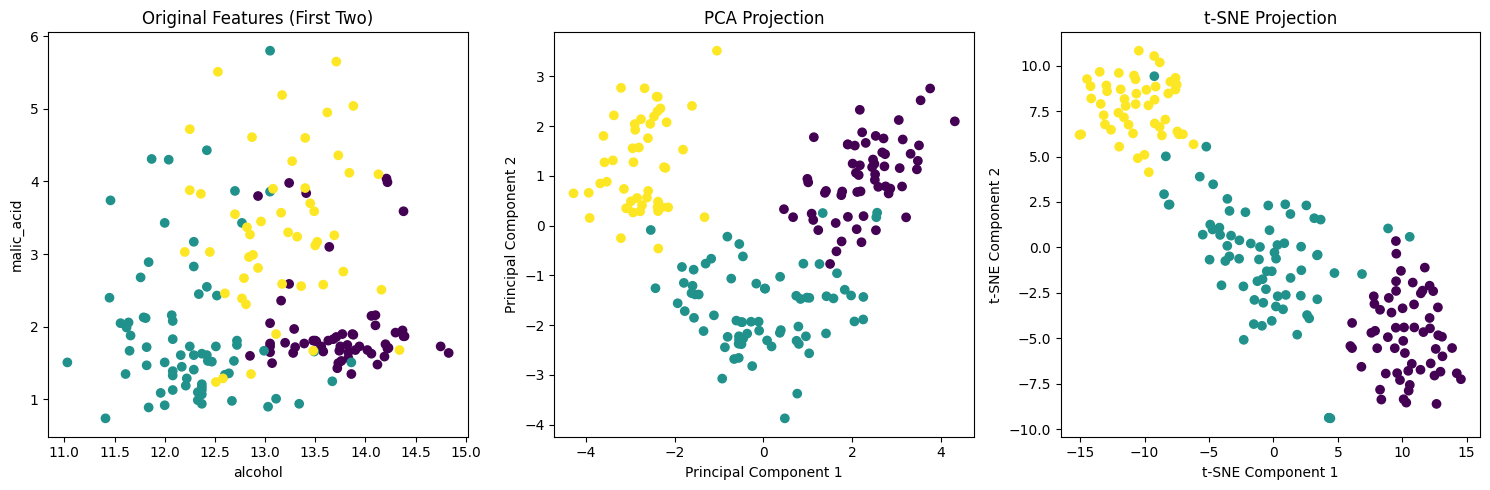

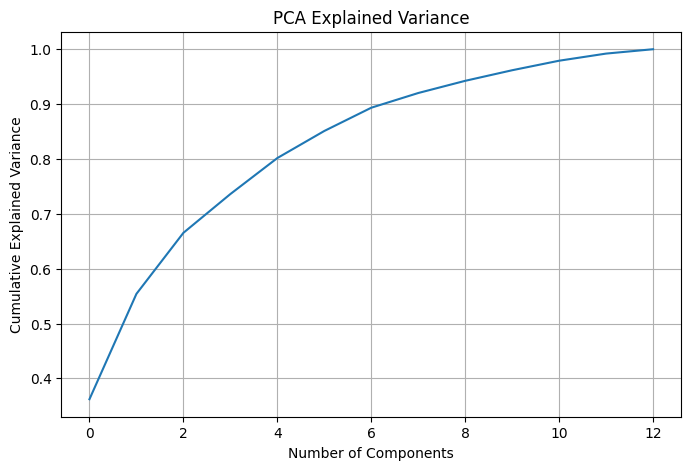

In [3]:
"""
Dimensionality Reduction Demonstration
This program shows the application of PCA and t-SNE for dimensionality reduction
and visualization of high-dimensional data.
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load wine dataset
data = load_wine()
X = data.data
y = data.target
feature_names = data.feature_names

print(f"Original dataset shape: {X.shape}")
print(f"Feature names: {feature_names}")

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"\nExplained variance ratio: {pca.explained_variance_ratio_}")

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualization
plt.figure(figsize=(15, 5))

# Original first two features
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Original Features (First Two)")

# PCA
plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("PCA Projection")

# t-SNE
plt.subplot(1, 3, 3)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title("t-SNE Projection")

plt.tight_layout()
plt.show()

# Cumulative explained variance for PCA
pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()